<a href="https://colab.research.google.com/github/UmmuGulsumSima/UmmuGulsumSima/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Gerekli kütüphaneleri yükleme ve ayarları yapma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IRIS.csv to IRIS.csv


In [3]:
# Veri setini iris_df olarak yükle
iris_df = pd.read_csv('/content/IRIS.csv')

# İlk birkaç satırı görüntüle
print("Sample rows of the Iris dataset:")
print(iris_df.sample(5))


Sample rows of the Iris dataset:
     sepal_length  sepal_width  petal_length  petal_width         species
135           7.7          3.0           6.1          2.3  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
44            5.1          3.8           1.9          0.4     Iris-setosa
118           7.7          2.6           6.9          2.3  Iris-virginica


Duplicate rows: Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


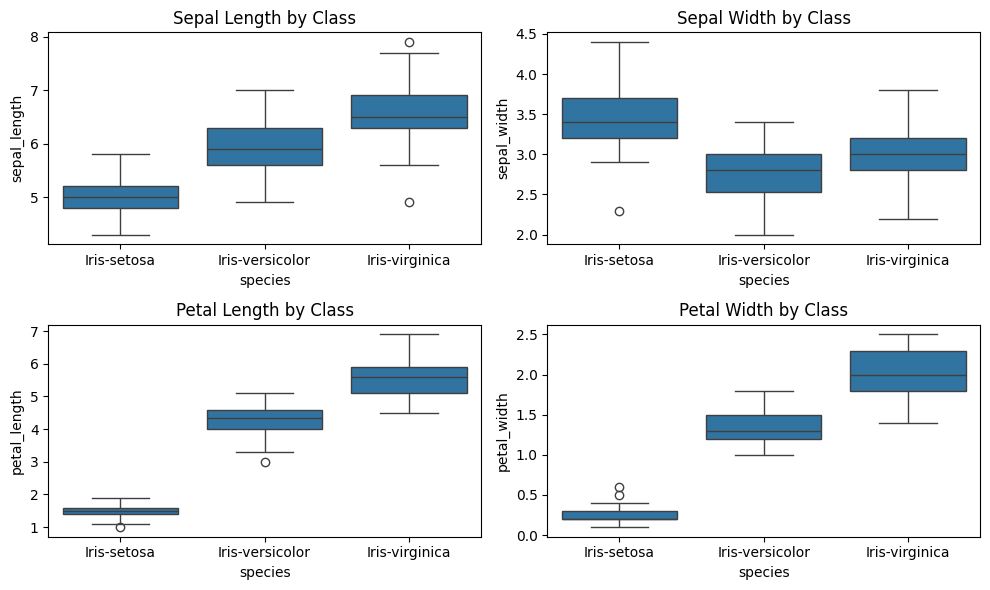

In [7]:
import matplotlib.pyplot as plt
# Yinelenen satırları bul ve kaldır
duplicate_rows = iris_df[iris_df.duplicated()]
print("Duplicate rows:", duplicate_rows)
iris_df = iris_df.drop_duplicates()

# Aykırı değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris_df)
plt.title('Sepal Length by Class')

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris_df)
plt.title('Sepal Width by Class')

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris_df)
plt.title('Petal Length by Class')

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris_df)
plt.title('Petal Width by Class')

plt.tight_layout()
plt.show()


In [9]:
# Özellikleri (X) ve hedef değişkeni (y) ayırma
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Hedef değişkeni kodlama
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (117, 4)
X_test: (30, 4)
y_train: (117,)
y_test: (30,)


Accuracy: 0.9333333333333333

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



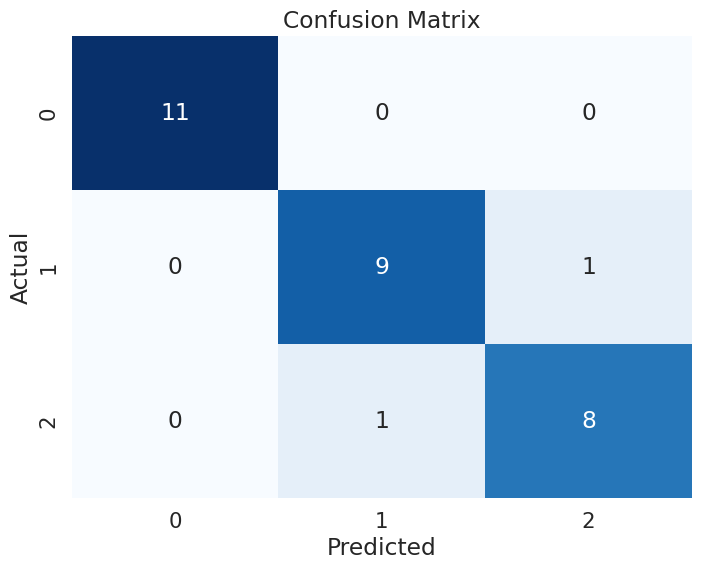

In [10]:
# Modeli eğitme
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf_classifier.predict(X_test)

# Doğruluk skoru, sınıflandırma raporu ve karmaşıklık matrisi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
# Yeni veri örneği ile tahmin yapma
sample_input = [[5.1, 3.5, 1.4, 0.2]]
predicted_label = rf_classifier.predict(sample_input)
predicted_species = label_encoder.inverse_transform(predicted_label)
print("Sample input:", sample_input)
print("Predicted Species:", predicted_species)


Sample input: [[5.1, 3.5, 1.4, 0.2]]
Predicted Species: ['Iris-setosa']
